In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
# variance inflation factor
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
# import traintestsplit
from sklearn.model_selection import train_test_split
# import crossval score
from sklearn.model_selection import cross_val_score

from sklearn.linear_model import ElasticNet
from sklearn.linear_model import Ridge
from sklearn.linear_model import LassoCV

# import metrics
from sklearn.metrics import mean_squared_error, r2_score
# set pd options to display all columns
pd.set_option('display.max_columns', None)

# Steps To Preprocess Data For Machine Learning

1. Importing Data
2. Cleaning Data
3. Splitting Data
4. Feature Engineering
5. Feature Selection
6. Feature Scaling


## 1. Importing Data

In [66]:
data = pd.read_csv('../data/ames.csv') # read in data

In [67]:
data.head(2)

,Order,PID,area,price,MS.SubClass,MS.Zoning,Lot.Frontage,Lot.Area,Street,Alley,Lot.Shape,Land.Contour,Utilities,Lot.Config,Land.Slope,Neighborhood,Condition.1,Condition.2,Bldg.Type,House.Style,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Roof.Style,Roof.Matl,Exterior.1st,Exterior.2nd,Mas.Vnr.Type,Mas.Vnr.Area,Exter.Qual,Exter.Cond,Foundation,Bsmt.Qual,Bsmt.Cond,Bsmt.Exposure,BsmtFin.Type.1,BsmtFin.SF.1,BsmtFin.Type.2,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,Heating,Heating.QC,Central.Air,Electrical,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,Kitchen.Qual,TotRms.AbvGrd,Functional,Fireplaces,Fireplace.Qu,Garage.Type,Garage.Yr.Blt,Garage.Finish,Garage.Cars,Garage.Area,Garage.Qual,Garage.Cond,Paved.Drive,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Pool.QC,Fence,Misc.Feature,Misc.Val,Mo.Sold,Yr.Sold,Sale.Type,Sale.Condition
0,1,526301100,1656,215000,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,1Fam,1Story,6,5,1960,1960,Hip,CompShg,BrkFace,Plywood,Stone,112.0,TA,TA,CBlock,TA,Gd,Gd,BLQ,639.0,Unf,0.0,441.0,1080.0,GasA,Fa,Y,SBrkr,1656,0,0,1.0,0.0,1,0,3,1,TA,7,Typ,2,Gd,Attchd,1960.0,Fin,2.0,528.0,TA,TA,P,210,62,0,0,0,0,NaN,NaN,NaN,0,5,2010,WD,Normal
1,2,526350040,896,105000,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Feedr,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,468.0,LwQ,144.0,270.0,882.0,GasA,TA,Y,SBrkr,896,0,0,0.0,0.0,1,0,2,1,TA,5,Typ,0,NaN,Attchd,1961.0,Unf,1.0,730.0,TA,TA,Y,140,0,0,0,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal


## 2. Cleaning Data

Steps to clean data:
1. Remove missing values
2. Remove duplicate values
3. Remove outliers
4. Remove non-numeric values
5. Remove non-numeric columns



In [68]:
def remove_missing_value_rows(df, thresh=0.5):
    """
    Remove rows with missing values above a certain threshold.
    """
    # calculate the fraction of missing values in each column
    missing_fraction = df.isnull().sum() / len(df)
    # filter the columns to those with a fraction above the threshold
    missing_cols = missing_fraction[missing_fraction > thresh].index
    # drop the columns
    df = df.drop(missing_cols, axis=1)
    # drop the rows with any missing values
    df = df.dropna(axis=0)
    return df

def remove_duplicate_values(df):
    """
    Remove duplicate values.
    """
    df = df.drop_duplicates()
    return df


In [69]:
# using the function to perform the steps above

print(f'Removing rows with missing values above 50% threshold...')
print(f'Original shape: {data.shape}')
data = remove_missing_value_rows(data)
print(f'After removing missing value rows: {data.shape}')

print(f'Removing Duplicate Values')
print(f'Original shape: {data.shape}')
data = remove_duplicate_values(data)
print(f'After removing duplicate values: {data.shape}')



Removing rows with missing values above 50% threshold...
Original shape: (2930, 82)
After removing missing value rows: (1156, 78)
Removing Duplicate Values
Original shape: (1156, 78)
After removing duplicate values: (1156, 78)


In [70]:
data.describe()

,Order,PID,area,price,MS.SubClass,Lot.Frontage,Lot.Area,Overall.Qual,Overall.Cond,Year.Built,Year.Remod.Add,Mas.Vnr.Area,BsmtFin.SF.1,BsmtFin.SF.2,Bsmt.Unf.SF,Total.Bsmt.SF,X1st.Flr.SF,X2nd.Flr.SF,Low.Qual.Fin.SF,Bsmt.Full.Bath,Bsmt.Half.Bath,Full.Bath,Half.Bath,Bedroom.AbvGr,Kitchen.AbvGr,TotRms.AbvGrd,Fireplaces,Garage.Yr.Blt,Garage.Cars,Garage.Area,Wood.Deck.SF,Open.Porch.SF,Enclosed.Porch,X3Ssn.Porch,Screen.Porch,Pool.Area,Misc.Val,Mo.Sold,Yr.Sold
count,1156.000000,1.156000e+03,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000,1156.000000
mean,1451.381488,6.835400e+08,1718.757785,223057.326125,56.211073,74.607266,10957.116782,6.794118,5.498270,1978.879758,1989.052768,155.455017,553.004325,51.202422,610.648789,1214.855536,1304.521626,409.790657,4.445502,0.493080,0.066609,1.717993,0.469723,2.898789,1.011246,6.945502,1.151384,1982.245675,2.063149,548.318339,120.720588,59.220588,21.344291,2.941176,24.122837,4.562284,39.256055,6.281142,2007.756920
std,844.478859,1.860304e+08,525.264568,93280.564462,37.776450,25.425448,8243.187192,1.359590,0.959345,28.963812,19.491008,222.021509,536.402400,178.141387,457.125109,465.929689,428.928081,470.965738,50.443244,0.528778,0.256299,0.526415,0.511293,0.798894,0.105493,1.555765,0.386468,25.299799,0.658208,202.490585,133.456833,71.780635,68.499066,25.934616,68.350019,49.611726,557.816678,2.724528,1.308876
min,1.000000,5.263011e+08,694.000000,12789.000000,20.000000,21.000000,1300.000000,2.000000,2.000000,1879.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,160.000000,483.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,3.000000,1.000000,1900.000000,1.000000,162.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000
25%,713.500000,5.281861e+08,1370.000000,157500.000000,20.000000,60.000000,8135.500000,6.000000,5.000000,1960.000000,1976.000000,0.000000,0.000000,0.000000,264.000000,893.750000,983.750000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,6.000000,1.000000,1965.000000,2.000000,430.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000
50%,1518.500000,5.344310e+08,1634.500000,194450.500000,60.000000,75.000000,10206.000000,7.000000,5.000000,1990.000000,1997.500000,40.000000,492.000000,0.000000,499.000000,1144.000000,1259.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,7.000000,1.000000,1993.000000,2.000000,513.500000,105.000000,40.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000
75%,2204.250000,9.063496e+08,1962.500000,264974.500000,70.000000,85.250000,12394.750000,8.000000,6.000000,2005.000000,2005.000000,250.250000,901.000000,0.000000,848.000000,1494.000000,1574.250000,793.500000,0.000000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,8.000000,1.000000,2005.000000,2.000000,670.000000,192.000000,84.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000
max,2930.000000,9.241520e+08,5642.000000,755000.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,5095.000000,2065.000000,1064.000000,2.000000,2.000000,3.000000,2.000000,5.000000,2.000000,15.000000,4.000000,2010.000000,4.000000,1488.000000,870.000000,570.000000,1012.000000,407.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000


standardize the column names

In [71]:
data.columns = [col.lower().replace(' ', '_').replace('.','_') for col in data.columns]

In [72]:
# data.info()

In [73]:
# one hot encode the categorical variables
data = pd.get_dummies(data, drop_first=True)


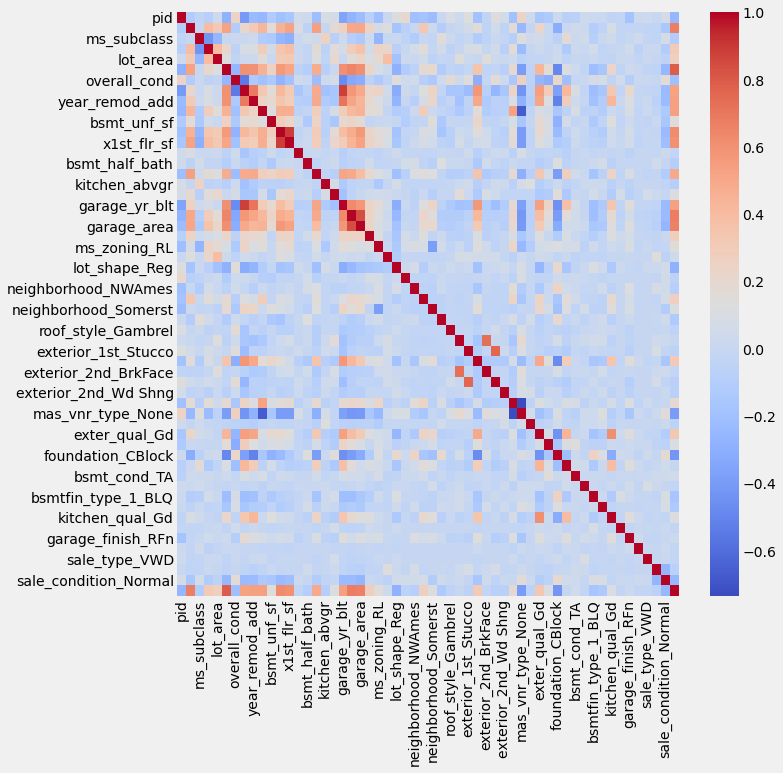

In [74]:
# use select k best to select the top 10 features
from sklearn.feature_selection import SelectKBest, f_regression,mutual_info_regression

# instantiate the class
selector = SelectKBest(score_func=f_regression, k=len(data.columns)//4) # select half the features

# fit the class to the data
selector.fit(data.drop(columns='price'), data['price'])

# get the column names of the top 10 features
cols = selector.get_support(indices=True)

# create a list of the top 10 column names including the target
top_cols = [data.columns[i] for i in cols] + ['price']


# create a dataframe of the top 10 columns
top_half = data[top_cols]

# create a heatmap of the top 10 columns
plt.figure(figsize=(10,10))
sns.heatmap(top_half.corr(), annot=False, cmap='coolwarm')
plt.show()


In [75]:
# drop any columns with a correlation above 0.75
# drop columns with a correlation below -0.75
# these are the columns that are highly correlated with other columns which will cause multicollinearity
for col in top_half.columns:
    if top_half[col].corr(top_half['price']) > 0.75 or top_half[col].corr(top_half['price']) < -0.75:
        top_half = top_half.drop(columns=col)
    

In [76]:
top_half.head()

,pid,area,ms_subclass,lot_frontage,lot_area,overall_cond,year_built,year_remod_add,mas_vnr_area,bsmt_unf_sf,total_bsmt_sf,x1st_flr_sf,low_qual_fin_sf,bsmt_half_bath,full_bath,kitchen_abvgr,fireplaces,garage_yr_blt,garage_cars,garage_area,wood_deck_sf,ms_zoning_RL,lot_shape_IR3,lot_shape_Reg,neighborhood_Mitchel,neighborhood_NWAmes,neighborhood_NoRidge,neighborhood_Somerst,house_style_SLvl,roof_style_Gambrel,exterior_1st_BrkFace,exterior_1st_Stucco,exterior_1st_VinylSd,exterior_2nd_BrkFace,exterior_2nd_Stucco,exterior_2nd_Wd Shng,mas_vnr_type_BrkFace,mas_vnr_type_None,exter_qual_Fa,exter_qual_Gd,exter_cond_TA,foundation_CBlock,bsmt_qual_Gd,bsmt_cond_TA,bsmt_exposure_Mn,bsmtfin_type_1_BLQ,heating_qc_Gd,kitchen_qual_Gd,garage_type_CarPort,garage_finish_RFn,sale_type_ConLw,sale_type_VWD,sale_condition_Family,sale_condition_Normal
0,526301100,1656,20,141.0,31770,5,1960,1960,112.0,441.0,1080.0,1656,0,0.0,1,1,2,1960.0,2.0,528.0,210,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,0,1
3,526353030,2110,20,93.0,11160,5,1968,1968,0.0,1045.0,2110.0,2110,0,0.0,2,1,2,1968.0,2.0,522.0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,1,1,0,1,0,0,0,0,0,0,0,0,0,1
4,527105010,1629,60,74.0,13830,5,1997,1998,0.0,137.0,928.0,928,0,0.0,2,1,1,1997.0,2.0,482.0,212,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,1
5,527105030,1604,60,78.0,9978,6,1998,1998,20.0,324.0,926.0,926,0,0.0,2,1,1,1998.0,2.0,470.0,360,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,1
8,527146030,1616,120,39.0,5389,5,1995,1996,0.0,415.0,1595.0,1616,0,0.0,2,1,1,1995.0,2.0,608.0,237,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,0,1,1,0,0,0,1,0,1,0,0,0,1


In [77]:
data.to_csv('../data/ames_processed.csv', index=False)